# Mod3Brief1 :  Ethique et responsabilité : Nouvelle sources de données

<Axes: >

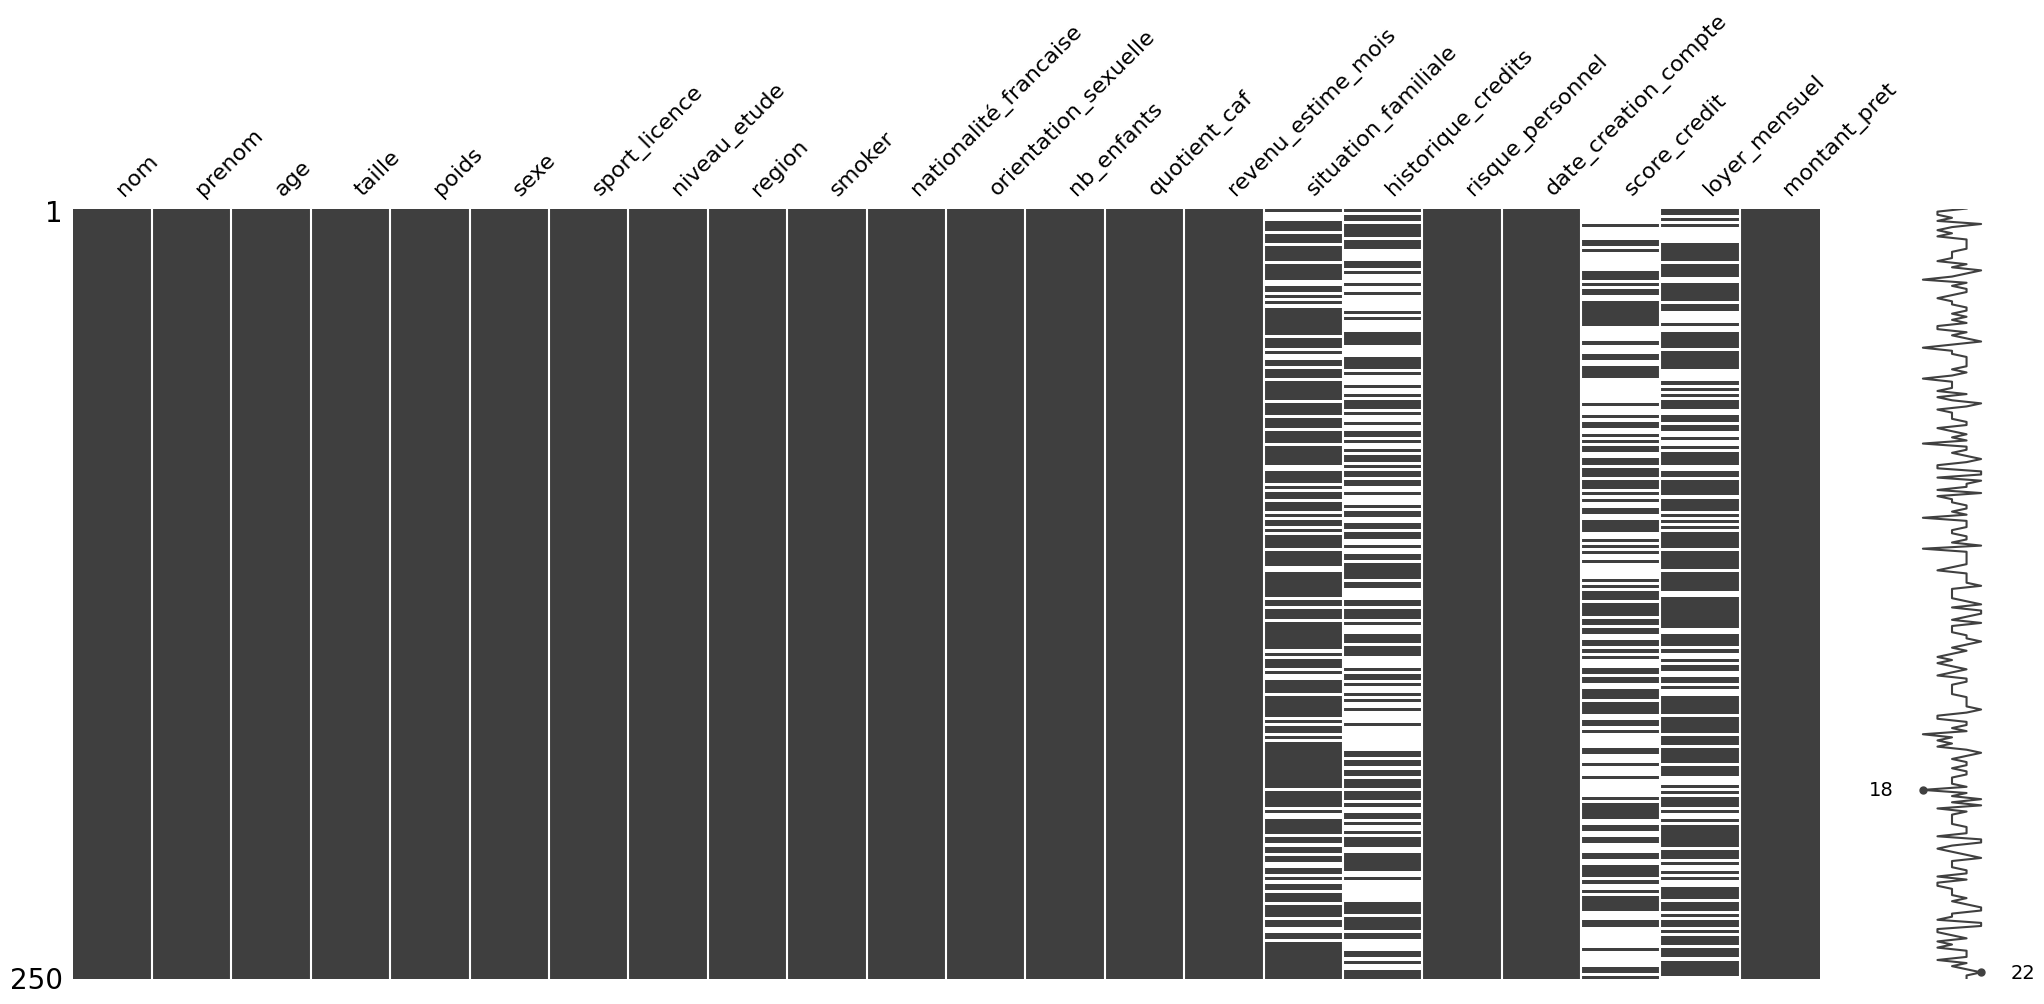

In [1]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('../data', "data-all-complete-684bf9cd92797851623245.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [2]:
collisions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  orientation_sexuelle   10000 non-null  object 
 12  nb_enfants             10000 non-null  int64  
 13  quotient_caf           10000 non-null  float64
 14  revenu_estime_mois     10000 non-null  int64  
 15  sit

In [3]:
collisions.describe()

,age,taille,poids,nb_enfants,quotient_caf,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000
mean,46.678800,169.98452,69.864350,1.612800,249.383700,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078
std,16.669812,9.88310,14.808592,1.393223,99.722026,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081
min,18.000000,129.80000,11.700000,-4.000000,-103.900000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000
25%,32.000000,163.40000,59.700000,1.000000,182.300000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000
50%,47.000000,170.00000,69.800000,2.000000,250.200000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057
75%,61.000000,176.60000,80.000000,3.000000,316.300000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527
max,75.000000,208.40000,132.200000,8.000000,621.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000


**Colonnes à supprimer pour des raisons éthiques ou RGPD :**  
- `orientation_sexuelle`  
- `nationalité_francaise`  
- `date_creation_compte`  

---

**Colonnes avec des valeurs manquantes :**  
- `situation_familiale` : 7545 non-null (object)  
- `historique_credits` : 4692 non-null (float64)  
- `score_credit` : 4744 non-null (float64)  
- `loyer_mensuel` : 7029 non-null (float64)  

*Remarque :*  
`situation_familiale` et `loyer_mensuel` ne sont pas complètes, il faudra les remplir.

---

**Colonnes nécessitant une attention particulière :**  
- `nb_enfants` : présence de valeurs négatives → filtrer pour garder uniquement `nb_enfants >= 0`  
- `poids` : minimum à 14 kg, seuil raisonnable à fixer à 42 kg  
- `quotient_caf` : présence de valeurs négatives → filtrer pour garder uniquement `quotient_caf >= 0`  

*Conclusion :*  
Ajouter des filtres sur `nb_enfants` et `quotient_caf` pour garantir la cohérence des données.

# Analyses et actions sur le dataset:



      

 ### On vire car pas RGPD et pas éthique
Nom et Prénom, c'est NON !

In [10]:
collisions.drop(columns=['nom'], inplace=True, errors='ignore')
collisions.drop(columns=['prenom'], inplace=True, errors='ignore')

 ### On vire car pas éthique
 influence du sexe et de la nationalité sont discréminants, pas de débat pour orientation sexuelle qui meriterai d'investiguer la provenance de la source de données

In [11]:
collisions.drop(columns=['sexe'], inplace=True, errors='ignore')
collisions.drop(columns=['nationalité_francaise'], inplace=True, errors='ignore')
collisions.drop(columns=['orientation_sexuelle'], inplace=True, errors='ignore')

 ### On rempli les colonnes manquantes avec la moyenne ou avec la mod

In [12]:
 ### on rempli loyer mensuel avec la moyenne 
collisions['loyer_mensuel'] = collisions['loyer_mensuel'].fillna(collisions['loyer_mensuel'].mean())
collisions['situation_familiale'] = collisions['situation_familiale'].fillna(collisions['situation_familiale'].mode()[0])

# On filtres les outliers : poids incohérent ou loyer négatif

In [13]:
### filter outlers values
collisions = collisions[(collisions['poids'] > 42) & (collisions['loyer_mensuel'] > 0) & (collisions["nb_enfants"] >= 0) & (collisions["quotient_caf"] >= 0)]

### On supprime les colonnes qui ne font pas sens ou qui peuvent permettre de reconstruire une identité (Attaque de reconstruction)

In [14]:
collisions.drop(columns=['date_creation_compte'], inplace=True, errors='ignore')

# Dataset Final

In [16]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9409 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9409 non-null   int64  
 1   taille               9409 non-null   float64
 2   poids                9409 non-null   float64
 3   sport_licence        9409 non-null   object 
 4   niveau_etude         9409 non-null   object 
 5   region               9409 non-null   object 
 6   smoker               9409 non-null   object 
 7   nb_enfants           9409 non-null   int64  
 8   quotient_caf         9409 non-null   float64
 9   revenu_estime_mois   9409 non-null   int64  
 10  situation_familiale  9409 non-null   object 
 11  risque_personnel     9409 non-null   float64
 12  loyer_mensuel        9409 non-null   float64
 13  montant_pret         9409 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.1+ MB


## Définition des colonnes numériques / categorielles
on défini les colonnes numériques et catégorielles pour les entrainnements de modèles

In [ ]:
# les valeurs numériques
numerical_cols = ["age", "taille", "poids", "nb_enfants", "quotient_caf", "revenu_estime_mois", "risque_personnel", "loyer_mensuel"]   
# les colonnes catégorielles
categorical_cols = ["sport_licence", "niveau_etude", "region", "smoker", "situation_familiale"]
# les valeurs manquantes à compléter à la moyenne et à ajouter dans une colonne boolean : _missing
missings_cols = ["score_credit", "historique_credits", "loyer_mensuel"]



In [17]:
# Sauvegarde du dataset nettoyé
collisions.to_csv(join('../data', 'df_data_all_complete_cleaned.csv'), index=False)